In [21]:
import torch
import numpy as np
import torch.linalg as linalg
import math

In [78]:
def calculate_1d_wasserstein_dist(X, Y):
    """
    Compute the 1D Wasserstein distance (Earth Mover's Distance) between two distributions X and Y.
    """
    
    # Ensure inputs are 1D distributions
    if X.ndim != 1 or Y.ndim != 1:
        raise ValueError("Expecting 1D inputs for X and Y!")
    
    # Ensure X and Y have the same shape
    if X.shape != Y.shape:
        raise ValueError("Expecting equal shapes for X and Y!")
    
    # Normalize the distributions to ensure they sum to 1 (optional depending on your case)
    X = X / X.sum()
    Y = Y / Y.sum()
    
    # Compute the cumulative distributions (CDFs)
    cdf_X = torch.cumsum(X, dim=0)
    cdf_Y = torch.cumsum(Y, dim=0)
    
    # Compute the Wasserstein distance as the L1 distance between the two CDFs
    wasserstein_dist = torch.sum(torch.abs(cdf_X - cdf_Y))
    
    return wasserstein_dist

In [6]:
import matplotlib.pyplot as plt
import numpy as np
import torch
from src.number_token_loss import NumberTokenLoss
from torch.nn.functional import softmax
import matplotlib

In [72]:
# Set Latex font

plt.rcParams['text.usetex'] = True
plt.rcParams['font.family'] = 'serif'

In [79]:
# Plot 1

real_number = 4
gt = torch.Tensor([0,0,0,0,1,0,0,0,0,0])

labels = torch.full((10,), 4)
all_numbers = torch.arange(0, 10)
logits = torch.full((10,10), 0.01)

for i in range(10):
    # Value on the diagonal sets "spikiness" of the distribution
    logits[i][i] = 5

logits_softmaxed = softmax(logits, dim=1)

loss_ce = torch.nn.CrossEntropyLoss(reduction='none')
loss_mse = torch.nn.MSELoss(reduction='none')


In [80]:
y_hat = (logits_softmaxed*all_numbers[None,:]).sum(dim=1)

loss_values_ce = loss_ce(logits,labels)
loss_values_mse = loss_mse(y_hat, labels)
loss_values_wass = [calculate_1d_wasserstein_dist(tensor, gt).item() for tensor in logits_softmaxed]

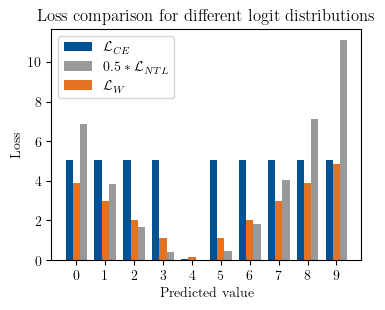

In [81]:
# Bar width
bar_width = 0.25

# X positions for the bars
r1 = all_numbers - bar_width
r2 = all_numbers + bar_width
r3 = all_numbers

# Create the plot
plt.figure(figsize=(4, 3))

# Plot bars
plt.bar(r1, loss_values_ce, width=bar_width, color='#005293', label='$\mathcal{L}_{CE}$')
plt.bar(r2, 0.5*loss_values_mse, width=bar_width, color='#999999', label='$0.5*\mathcal{L}_{NTL}$')
#plt.bar(r3, 0.5*loss_values_mse+loss_values_ce, width=bar_width, color='#e37222', label='$0.5*\mathcal{L}_{NTL} + \mathcal{L}_{CE}$')
plt.bar(r3, loss_values_wass, width=bar_width, color='#e37222', label='$\mathcal{L}_{W}$')

# Add labels
plt.xlabel('Predicted value')
plt.ylabel('Loss')
plt.title('Loss comparison for different logit distributions')
plt.xticks(all_numbers)  # Set x-ticks to be the integer values
plt.legend()

plt.savefig('loss_comparison.pdf',bbox_inches='tight')
# Show the plot
plt.show()

#add summation

In [62]:
# Second Plot

real_number = 4
gt = torch.Tensor([0,1,0])
labels = torch.full((3,),1 )
label_values = torch.full((3,), 4)
all_numbers = torch.Tensor([3,4,5])
logits = torch.zeros((3,3))


logits = torch.Tensor([[0.2, 0.6, 0.2],
                        [0.333, 0.333, 0.333],
                        [0.45, 0.1, 0.45]])

logits_softmaxed = softmax(logits, dim=1)

In [63]:
y_hat = (logits_softmaxed*all_numbers[None,:]).sum(dim=1)

loss_values_ce = loss_ce(logits,labels)
loss_values_mse = loss_mse(y_hat, label_values)
loss_values_wass = [calculate_1d_wasserstein_dist(tensor, gt).item() for tensor in logits_softmaxed]

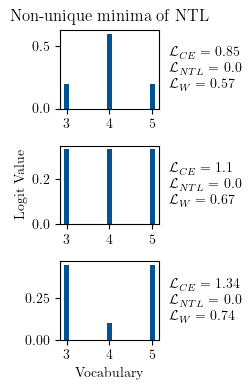

In [66]:
# Bar width
bar_width = 0.12

fig, axes = plt.subplots(3, 1, figsize=(8, 4))

# Loop over the subplots and plot 2 sets per subplot
for i, ax in enumerate(axes):
    r1 = all_numbers
    ax.bar(r1, logits[i], width=bar_width, color='#005293')
    if i ==0:
        ax.title.set_text('Non-unique minima of NTL')

    if i ==1:
        ax.set_ylabel('Logit Value')
    if i ==2:
        ax.set_xlabel('Vocabulary')
    # Set title and labels
    #ax.set_ylabel('Logit Value')
    ax.set_xticks(all_numbers)
    ax.text(1.1, 0.65, "$\mathcal{L}_{CE} = $"+f" {round(loss_values_ce[i].item(),2)}", transform=ax.transAxes)
    ax.text(1.1, 0.45, "$\mathcal{L}_{NTL} = $"+f" {round(0.5*loss_values_mse[i].item(),2)}", transform=ax.transAxes)
    #ax.text(1.1, 0.25, "$\mathcal{L}_{CE}+0.5*\mathcal{L}_{NTL} = $"+f" {round(loss_values_ce[i].item()+0.5*loss_values_mse[i].item(),2)}", transform=ax.transAxes)
    ax.text(1.1, 0.25, "$\mathcal{L}_{W} = $"+f" {round(loss_values_wass[i],2)}", transform=ax.transAxes)

plt.tight_layout()
plt.subplots_adjust(right=0.2)

plt.savefig('loss_comparison_2.pdf',bbox_inches='tight')

# Adjust layout and show the plot
plt.show()